In [1]:
# Librería para leer el archivo CSV

import pandas as pd
import numpy


# Librería para construir el modelo Arbol de Decisiones

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



# Librerías para plotear el Arbol de Decisiones
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

/home/aaldaco/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Lee el archivo de datos CSV

In [2]:
helicoptero = pd.read_csv('Python_tiempoDeVuelo_DT.csv')

In [3]:
helicoptero

,Papel,Ala,Cuerpo,Clip,TiempoVuelo,tv
0,Ligero,Larga,Largo,No,6.200000,tvL
1,Ligero,Larga,Largo,Si,5.383333,tvL
2,Ligero,Larga,Corto,No,6.233333,tvL
3,Ligero,Larga,Corto,Si,5.333333,tvL
4,Ligero,Corta,Largo,No,5.423333,tvL
5,Ligero,Corta,Largo,Si,5.316667,tvL
6,Ligero,Corta,Corto,No,5.996667,tvL
7,Ligero,Corta,Corto,Si,4.436667,tvL
8,Pesado,Larga,Largo,No,3.233333,tvM
9,Pesado,Larga,Largo,Si,3.500000,tvM


## Sklearn Decision Trees do not handle conversion of categorical strings to numbers.

## Convert categorical data to dummy coding

In [4]:
one_hot_data = pd.get_dummies(helicoptero[['Papel','Ala','Cuerpo','Clip']],drop_first=True)

In [5]:
one_hot_data

,Papel_Pesado,Ala_Larga,Cuerpo_Largo,Clip_Si
0,0,1,1,0
1,0,1,1,1
2,0,1,0,0
3,0,1,0,1
4,0,0,1,0
5,0,0,1,1
6,0,0,0,0
7,0,0,0,1
8,1,1,1,0
9,1,1,1,1


## Renombra los datos en X , y

In [6]:
X=one_hot_data
y=helicoptero[helicoptero.columns[5:6]]

## Crea del modelo Arbol de Decision

In [7]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

## Plot the TREE

In [8]:
# Nombres de las columnas de X
feature_names = ["Papel_Pesado","Ala_Larga","Cuerpo_Largo","Clip_Si"]

# Nombres de las clases ordenados alfabeticamente
target_names = ["tvC","tvL","tvM"]


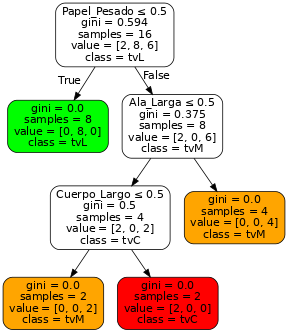

In [10]:
# Construir el plot del arbol

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature_names,
                class_names=target_names,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


# Los nodos de decision no tienen color

colors =  ('red', 'green', 'orange','white')
nodes = graph.get_node_list()
for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        values = clf.tree_.value[int(node.get_name())][0]
        #color only nodes where only one class is present
        if max(values) == sum(values):    
            node.set_fillcolor(colors[numpy.argmax(values)])
        #mixed nodes get the default color
        else:
            node.set_fillcolor(colors[-1])

graph.set_size('"3,4!"')
Image(graph.create_png())